# Proyecto Final : Airline Passenger Satisfaction

# Parte 4: Support Vector Machines

#### Realizado por Javier Gómez Moraleda y Unai Piris Ibañez

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn.svm as skl

from pandas.io.parsers import read_csv
from scipy.io import loadmat
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix

## Carga de datos

In [2]:
# Carga CSV
def load_csv(file_name):
    # CSV to DataFrame
    data = read_csv(file_name).to_numpy()
    return data[:,1:]

In [3]:
# Cargamos los ficheros procesados
train = load_csv('data/processed/train_processed.csv')
validation = load_csv('data/processed/validation_processed.csv')
test = load_csv('data/processed/test_processed.csv')

In [4]:
# Dividimos entre las columnas de datos y la predicción
X_train = train[:,:-1]
y_train = train[:,-1]
y_train = y_train.astype(np.uint8)
X_validation = validation[:,:-1]
y_validation = validation[:,-1]
y_validation = y_validation.astype(np.uint8)
X_test = test[:,:-1]
y_test = test[:,-1]
y_test = y_test.astype(np.uint8)

## Kernel Lineal

In [5]:
# Diferentes valores de C
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
scores = np.zeros(len(C_vec))

In [6]:
# Entrenamiento
for i in range(0, len(C_vec)):
    svm = skl.SVC(C=C_vec[i], kernel = 'linear')
    svm.fit(X_train, y_train)
    y_val_p = svm.predict(X_validation)
    hits = np.sum(y_val_p == y_validation) / len(y_validation)
    scores[i] = hits*100

In [7]:
# Matriz de porcentajes de aciertos obtenida
print(scores)

[88.75 88.85 88.75 88.7  88.6  88.6  88.6  88.6  88.6 ]


In [8]:
# Obtenemos los índices de los valores máximos
indexes = np.where(scores == np.amax(scores))

In [9]:
# Nos quedamos con el primer valor máximo que aparece
c_max_index = indexes[0][0]
c_max = C_vec[c_max_index]

In [10]:
# Entrenamos y observamos el resultado
svm = skl.SVC(C=c_max, kernel = 'linear')
svm.fit(X_train, y_train)
y_testp = svm.predict(X_test)
hits = np.sum(y_testp == y_test) / len(y_test)
print("C =", c_max, ", porcentaje acertado: ", hits * 100, "%")

C = 0.03 , porcentaje acertado:  86.85000000000001 %


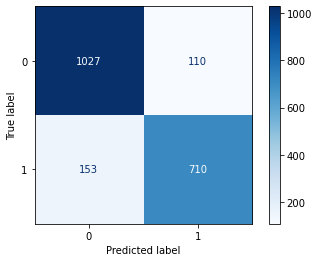

In [11]:
# Matriz de confusión
plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues)
plt.savefig('figures/parte4/confusion_matrix_linear.png')

In [12]:
# Accuracy, precision, recall and f1
target_names = ['neutral or dissatisfied', 'satisfied']
print(classification_report(y_testp, y_test, target_names=target_names))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.90      0.87      0.89      1180
              satisfied       0.82      0.87      0.84       820

               accuracy                           0.87      2000
              macro avg       0.86      0.87      0.87      2000
           weighted avg       0.87      0.87      0.87      2000



## Kernel Gaussiano

In [13]:
# Diferentes valores de C y sigma
C_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
sigma_vec = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
scores = np.zeros((len(C_vec), len(sigma_vec)))

In [14]:
# Entrenamiento
for i in range(0, len(C_vec)):
    for j in range(0, len(sigma_vec)):
        svm = skl.SVC(C=C_vec[i], kernel = 'rbf', gamma= 1 / (2 * sigma_vec[j]**2), cache_size=12000)
        svm.fit(X_train, y_train)
        y_val_p = svm.predict(X_validation)
        hits = np.sum(y_val_p == y_validation) / len(y_validation)
        scores[i, j] = hits*100

In [15]:
# Matriz de porcentajes de aciertos obtenida
print(scores)

[[58.4  58.4  58.4  58.4  58.4  84.6  86.95 58.4 ]
 [58.4  58.4  58.4  58.4  58.4  88.25 88.1  74.55]
 [58.4  58.4  58.4  58.4  62.45 90.9  89.35 86.9 ]
 [58.4  58.4  58.4  58.4  73.6  92.85 90.4  88.1 ]
 [58.4  58.4  58.4  58.45 80.35 94.15 91.2  88.4 ]
 [58.4  58.4  58.4  58.5  82.3  94.1  92.6  89.05]
 [58.4  58.4  58.4  58.5  82.3  93.7  93.95 89.7 ]
 [58.4  58.4  58.4  58.5  82.3  92.8  94.4  90.45]]


In [16]:
# Obtenemos los índices de los valores máximos
indexes = np.where(scores == np.amax(scores))
indexes_list = list(zip(indexes[0], indexes[1]))
print(indexes_list)

[(7, 6)]


In [17]:
# Nos quedamos con el primer valor máximo que aparece
c_max_index = indexes_list[0][0]
c_max = C_vec[c_max_index]
sigma_max_index = indexes_list[0][1]
sigma_max = C_vec[sigma_max_index]

In [18]:
# Entrenamos y observamos el resultado
svm = skl.SVC(C=c_max, kernel = 'rbf', gamma= 1 / (2 * sigma_max**2))
svm.fit(X_train, y_train)
y_testp = svm.predict(X_test)
hits = np.sum(y_testp == y_test) / len(y_test)
print("C =", c_max, ", sigma =", sigma_max, ", porcentaje acertado: ", hits * 100, "%")

C = 30 , sigma = 10 , porcentaje acertado:  92.5 %


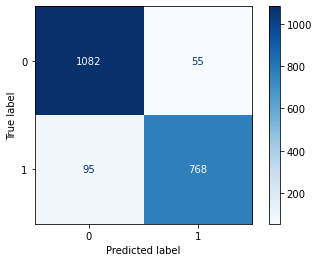

In [19]:
# Matriz de confusión
plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues)
plt.savefig('figures/parte4/confusion_matrix_gaussian.png')

In [20]:
# Accuracy, precision, recall and f1
target_names = ['neutral or dissatisfied', 'satisfied']
print(classification_report(y_testp, y_test, target_names=target_names))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.92      0.94      1177
              satisfied       0.89      0.93      0.91       823

               accuracy                           0.93      2000
              macro avg       0.92      0.93      0.92      2000
           weighted avg       0.93      0.93      0.93      2000

